In [1]:
import __init__
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.dataset_utils import ensure_dataset_scale, plot_dataset

In [2]:
n_samples = 750
seed = 42

# No structure dataset

Unique labels: [0 1 2]
Label 0 has 250 samples
Label 1 has 250 samples
Label 2 has 250 samples


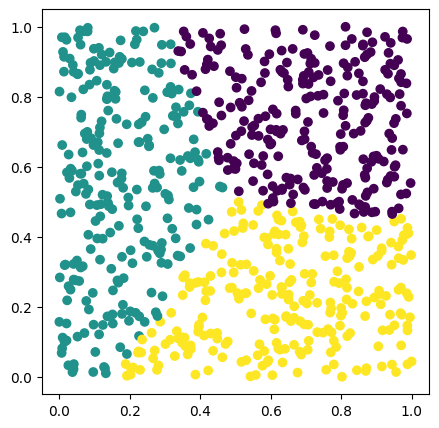

In [3]:
from sklearn.cluster import KMeans

rng = np.random.RandomState(seed)
no_structure_ds = rng.rand(n_samples*2, 2)

kmeans = KMeans(
    n_clusters=3,
    random_state=42
)

kmeans.fit(no_structure_ds)
labels = kmeans.labels_

class_size = n_samples // 3
no_structure_ds_0 = no_structure_ds[labels == 0]
no_structure_ds_0 = no_structure_ds_0[:class_size]
labels_0 = np.zeros(class_size)

no_structure_ds_1 = no_structure_ds[labels == 1]
no_structure_ds_1 = no_structure_ds_1[:class_size]
labels_1 = np.ones(class_size)

no_structure_ds_2 = no_structure_ds[labels == 2]
no_structure_ds_2 = no_structure_ds_2[:class_size]
labels_2 = np.full(class_size, 2)

no_structure_ds = np.concatenate([no_structure_ds_0, no_structure_ds_1, no_structure_ds_2])
labels = np.concatenate([labels_0, labels_1, labels_2])

no_structure_ds = pd.DataFrame(no_structure_ds, columns=["x", "y"])
no_structure_ds["label"] = labels
no_structure_ds = ensure_dataset_scale(no_structure_ds)
plot_dataset(no_structure_ds)

no_structure_ds.to_csv("../data/datasets/no_structure.csv", index=False, encoding="utf-8-sig")

# Circles dataset

Unique labels: [2 1 0]
Label 2 has 250 samples
Label 1 has 250 samples
Label 0 has 250 samples


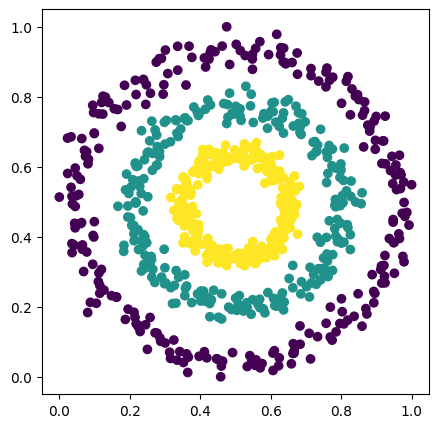

In [4]:
from sklearn.datasets import make_circles


circles_ds_outer, _ = make_circles(
    n_samples=n_samples // 3,
    noise=0.1,
    random_state=42,
    factor=0.99,
)
circles_ds_outer = circles_ds_outer / 3
circles_labels_outer = np.ones(circles_ds_outer.shape[0]) * 2

circles_ds_inner, circles_labels_inner = make_circles(
    n_samples=(n_samples // 3) * 2,
    noise=0.05,
    random_state=42,
    factor=0.65,
)

circles_ds = np.concatenate([circles_ds_outer, circles_ds_inner], axis=0)
circles_labels = np.concatenate([circles_labels_outer, circles_labels_inner], axis=0)

circles_ds = pd.DataFrame(circles_ds, columns=["x", "y"])
circles_ds["label"] = circles_labels
circles_ds = ensure_dataset_scale(circles_ds)
plot_dataset(circles_ds)

circles_ds.to_csv("../data/datasets/circles.csv", index=False, encoding="utf-8-sig")

# Moons dataset

Unique labels: [2 1 0]
Label 2 has 250 samples
Label 1 has 250 samples
Label 0 has 250 samples


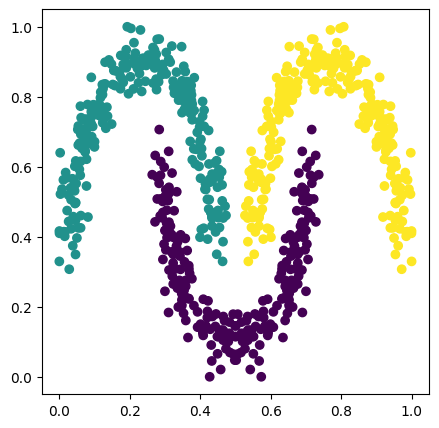

In [18]:
from sklearn.datasets import make_moons

moons_ds_1st, moons_labels_1st = make_moons(
    n_samples=(n_samples // 3) * 2,
    noise=0.09,
    random_state=seed,    
)
moons_ds_1st[:, 0] = moons_ds_1st[:, 0] * 0.2
moons_labels_1st = np.where(moons_labels_1st == 1, 2, moons_labels_1st)

moons_ds_2nd, moons_labels_2nd = make_moons(
    n_samples=(n_samples // 3) * 2,
    noise=0.09,
    random_state=seed,
)
moons_ds_2nd[:, 0] = moons_ds_2nd[:, 0] * 0.2
moons_ds_2nd[:, 0] = -moons_ds_2nd[:, 0]

moons_ds = np.concatenate([moons_ds_1st, moons_ds_2nd], axis=0)
moons_ds[:, 1] = -moons_ds[:, 1]
moons_labels = np.concatenate([moons_labels_1st, moons_labels_2nd], axis=0)

moons_ds[moons_labels == 1, 0] -= 0.05
moons_ds[moons_labels == 2, 0] += 0.05

moons_lower_half = moons_ds[moons_labels == 0]
moons_lower_half = moons_lower_half[::2]
moons_lower_half_labels = np.zeros(moons_lower_half.shape[0])
moons_ds = np.concatenate([moons_ds[moons_labels != 0], moons_lower_half], axis=0)
moons_labels = np.concatenate([moons_labels[moons_labels != 0], moons_lower_half_labels], axis=0)

moons_ds = pd.DataFrame(moons_ds, columns=["x", "y"])
moons_ds["label"] = moons_labels
moons_ds = ensure_dataset_scale(moons_ds)
plot_dataset(moons_ds)

moons_ds.to_csv("../data/datasets/moons.csv", index=False, encoding="utf-8-sig")

# Varied distribution dataset

Unique labels: [2 0 1]
Label 2 has 250 samples
Label 0 has 250 samples
Label 1 has 250 samples


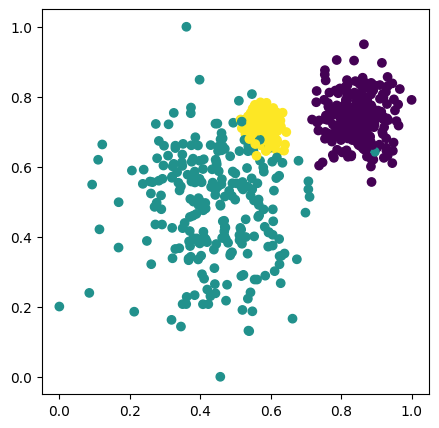

In [34]:
from sklearn.datasets import make_blobs

blobs_ds, blobs_labels = make_blobs(n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed+11)

blobs_ds = pd.DataFrame(blobs_ds, columns=["x", "y"])
blobs_ds["label"] = blobs_labels
blobs_ds = ensure_dataset_scale(blobs_ds)
plot_dataset(blobs_ds)

blobs_ds.to_csv("../data/datasets/varied_blobs.csv", index=False, encoding="utf-8-sig")

# Anisotropically distributed dataset

Unique labels: [1 0 2]
Label 1 has 250 samples
Label 0 has 250 samples
Label 2 has 250 samples


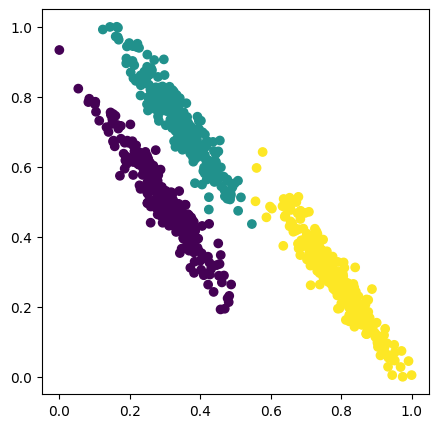

In [36]:
random_state = 170
aniso_ds, aniso_labels = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso_ds = np.dot(aniso_ds, transformation)

aniso_ds = pd.DataFrame(aniso_ds, columns=["x", "y"])
aniso_ds["label"] = aniso_labels
aniso_ds = ensure_dataset_scale(aniso_ds)
plot_dataset(aniso_ds)

aniso_ds.to_csv("../data/datasets/aniso.csv", index=False, encoding="utf-8-sig")

# Simple blobs

Unique labels: [1 2 0]
Label 1 has 250 samples
Label 2 has 250 samples
Label 0 has 250 samples


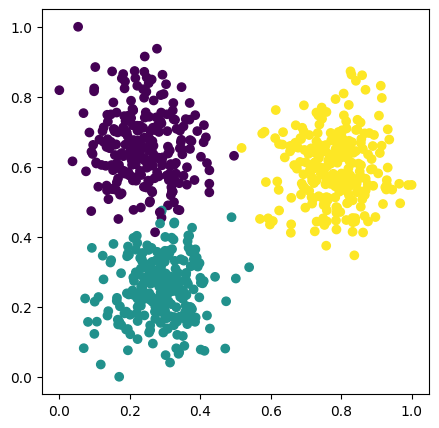

In [38]:
simple_ds, simple_labels = datasets.make_blobs(n_samples=n_samples, random_state=30)

simple_ds = pd.DataFrame(simple_ds, columns=["x", "y"])
simple_ds["label"] = simple_labels
simple_ds = ensure_dataset_scale(simple_ds)
plot_dataset(simple_ds)

simple_ds.to_csv("../data/datasets/simple.csv", index=False, encoding="utf-8-sig")

# Circle plus moons dataset

Unique labels: [1 0 2]
Label 1 has 250 samples
Label 0 has 250 samples
Label 2 has 250 samples


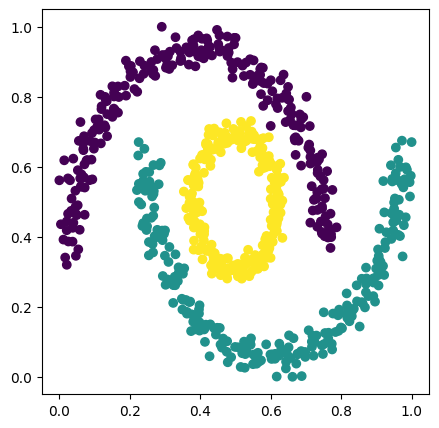

In [66]:
moons_part_ds, moons_part_labels = make_moons(
    n_samples=(n_samples // 3) * 2,
    noise=0.05,
    random_state=seed,
)

moons_part_ds[moons_part_labels == 1, 0] -= 0.21
moons_part_ds[moons_part_labels == 0, 0] += 0.21

circle_part_ds, _ = make_circles(
    n_samples=n_samples // 3,
    noise=0.09,
    random_state=seed,
    factor=0.99,
)
circle_part_labels = np.full(n_samples // 3, 2)
circle_part_ds = circle_part_ds / 3
circle_part_ds[:, 0] += 0.5
circle_part_ds[:, 1] += 0.25

mixed_ds = np.concatenate([moons_part_ds, circle_part_ds], axis=0)
mixed_labels = np.concatenate([moons_part_labels, circle_part_labels], axis=0)

mixed_ds = pd.DataFrame(mixed_ds, columns=["x", "y"])
mixed_ds["label"] = mixed_labels
mixed_ds = ensure_dataset_scale(mixed_ds)
plot_dataset(mixed_ds)

mixed_ds.to_csv("../data/datasets/mixed.csv", index=False, encoding="utf-8-sig")